## Exploratory and Geospatial Analysis of Artisanal Mining Sites in the DRC

The latest 2023 Cobalt Market Report noted that 73% of cobalt demand is being driven by battery applications. As the world slowly embraces a transition to clean energy, 96% of the 2023 demand growth was due to electric vehicle (EV) production, followed by portable electronics and energy storage, as cobalt remains a necessary component of lithium-ion batteries. As demand increases due to cobalt's potential increase to battery life and energy intensity, the supply chain is seeing increased pressure and urgent efforts to address the persistent human rights violations are more important than ever. Additionally, research and development and investment is needed to reduce cobalt in lithium-ion batteries and cobalt-free battery alternatives that are economically viable and safe. Such alternatives have already started to be explored including organic cathode materials developed by MIT chemists and lithium-iron phosphate batteries already in use in some of Tesla's newer vehicles. 

The Democratic Republic of the Congo (DRC) mines 2/3's of the global cobalt supply and has the world's largest reserve. Below I will explore open data from artisinal mining sites in the Eastern DRC made available by the International Peace Information Service (IPIS). IPIS is an independent research institute with a mission to realize a vision of durable peace, sustainable development and the fulfilment of human rights. The focus is on highlighting the hazardous working conditions and environmental disruption to surrounding protected natural areas.

In [1]:
# Import required python packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the mining data, we will utilize the GeoJSON file from https://geo.ipisresearch.be/geoserver/web/wicket/bookmarkable/org.geoserver.web.demo.MapPreviewPage?0
drc_mining_sites = gpd.read_file("http://geo.ipisresearch.be/geoserver/public/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=public:cod_mines_curated_all_opendata_p_ipis&outputFormat=application%2Fjson")

In [4]:
# Print the first few rows and Coordinate Reference System (CRS)
print(drc_mining_sites.columns.values)
print(drc_mining_sites.info)
print(drc_mining_sites.crs)

['vid' 'cid' 'id' 'source' 'project' 'pcode' 'name' 'visit_date'
 'visit_onsite' 'visit_onsite_novisitreason' 'longitude' 'latitude'
 'location_origin' 'province' 'province_old' 'territoire' 'collectivite'
 'groupement' 'village' 'workers_numb' 'access_dry' 'access_wet'
 'is_3t_mine' 'is_gold_mine' 'mineral1' 'selling_points_mineral1'
 'final_destination_mineral1' 'mineral2' 'selling_points_mineral2'
 'final_destination_mineral2' 'mineral3' 'selling_points_mineral3'
 'final_destination_mineral3' 'mercury' 'presence' 'interference'
 'armed_group1' 'type_armed_group1' 'frequency_armed_group1'
 'taxation_armed_group1' 'commerce_taxation_armed_group1'
 'entrance_taxation_armed_group1' 'monopoly_armed_group1'
 'buying_minerals_armed_group1' 'digging_armed_group1'
 'forced_labour_armed_group1' 'pillaging_armed_group1'
 'pit_ownership_armed_group1' 'armed_group2' 'type_armed_group2'
 'frequency_armed_group2' 'taxation_armed_group2'
 'commerce_taxation_armed_group2' 'entrance_taxation_armed_gr

In [5]:
# Replace empty strings with np.nan
drc_mining_sites['workers_numb'].replace('', np.nan, inplace=True)

# Drop rows where there are no workers listed
drc_mining_sites.dropna(subset=["workers_numb"], inplace=True)
print(drc_mining_sites.info)

<bound method DataFrame.info of        vid   cid   id                      source        project  \
0        1     1    1  IPIS - Ministère des Mines    IPIS - 2009   
1        2     2    2  IPIS - Ministère des Mines    IPIS - 2009   
5        6     6    6  IPIS - Ministère des Mines    IPIS - 2009   
6        7     7    7  IPIS - Ministère des Mines    IPIS - 2009   
7        8     8    8  IPIS - Ministère des Mines    IPIS - 2009   
...    ...   ...  ...                         ...            ...   
6948  6949  5320  969                        IPIS  IPIS - Madini   
6949  6950  5321  970                        IPIS  IPIS - Madini   
6950  6951  5322  971                        IPIS  IPIS - Madini   
6951  6952  5323  972                        IPIS  IPIS - Madini   
6952  6953  5324  973                        IPIS  IPIS - Madini   

             pcode        name  visit_date  visit_onsite  \
0     codmine00191        Eohe  2009-01-01             1   
1     codmine00192        Eita 

In [6]:
# We can narrow down the list of the minerals with the most mines in the DRC
# The minerals are an object, let's first convert to a category. We're only going to be using the main mineral in the mineral1 column
drc_mining_sites["mineral1"] = drc_mining_sites["mineral1"].astype("category")
#print(drc_mining_sites["mineral1"].cat.categories)

#Let's see the total occurances for each mineral category
drc_mining_sites['mineral1'].value_counts()

mineral1
Or                                      3636
Cassitérite                             1285
Coltan                                   292
Cuivre                                   109
Wolframite                                76
Diamant                                   74
Cobalt                                    27
Tourmaline                                14
Manganèse                                  2
Améthyste                                  1
Manvenve                                   1
Minerais mixtes (Cassitérite/Coltan)       1
Monazite                                   1
Pyrochlore                                 1
Saphir                                     1
Name: count, dtype: int64

In [7]:
# A few of the minerals only have one existing mine in the Congo, let's narrrow down by number of mines
# Let's group all of others under a category of 'Other'
# First let's drop some of the null values in the minerals column
drc_mining_sites.dropna(subset=["mineral1"], inplace=True)

# Create a mapping to group certain minerals as 'Other'
mineral_mapping = {
    'Améthyste': "Other",
    'Manvenve': "Other",
    'Manganèse': "Other",
    'Minerais mixtes (Cassitérite/Coltan)': "Other",
    'Monazite': "Other",
    'Pyrochlore': "Other",
    'Saphir': "Other",
    'Tourmaline': "Other",
    'inconnu': "Other"
}

# Create a new column with the new 'Other' minerals and the ones we want to focus on
drc_mining_sites["grouped_minerals"] = drc_mining_sites["mineral1"].map(mineral_mapping).fillna(drc_mining_sites["mineral1"])
# Now let's get the new count per category
drc_mining_sites['grouped_minerals'].value_counts()

grouped_minerals
Or             3636
Cassitérite    1285
Coltan          292
Cuivre          109
Wolframite       76
Diamant          74
Cobalt           27
Other            22
Name: count, dtype: int64

## Mining sites visits 
Let's determine how many mining sites were visited by province. Additionally, let's dig into the qualification statuses of different mines. Qualification visits are the official record of mining site validations or ‘qualifications’ - an official procedure defined by the National Minister of Mines 1 to certify mining sites as free of influence from armed groups using colored labels: green, yellow or red. 

2986


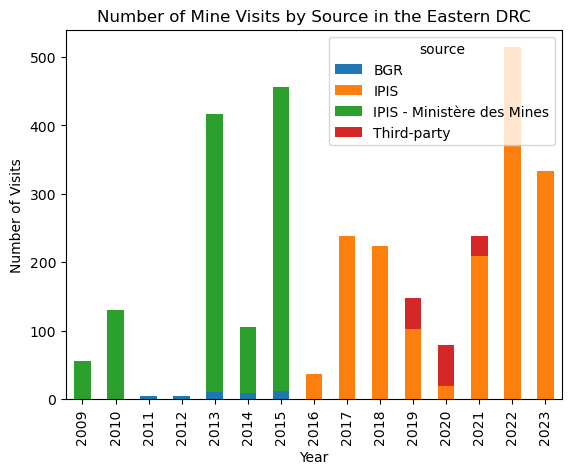

5521


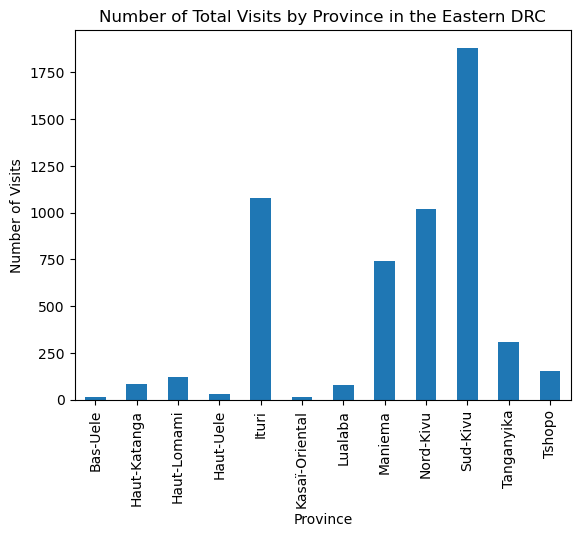

In [11]:
# How many unique mines were visited? Keeping only the number of mines visited and the last visit (considering mines can be revisited multiple times)
unique_mines_visited = drc_mining_sites.sort_values('visit_date').groupby('pcode').tail(1)
print(len(unique_mines_visited))
# print(unique_mines_visited.loc[unique_mines_visited['pcode'] == 'codmine00191'])

# How many visits were carried out per year and per project?
unique_mines_visited['visit_date'] = pd.to_datetime(unique_mines_visited['visit_date'])
unique_mines_visited['visit_year'] = unique_mines_visited['visit_date'].dt.year
projects_per_year = unique_mines_visited.groupby(['visit_year', 'source']).size().unstack(fill_value=0)
projects_per_year.plot(kind='bar', stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of Visits")
plt.title("Number of Mine Visits by Source in the Eastern DRC")
plt.show()

# How many visits does this dataset contain? Simply counting the number of lines
drc_mining_sites['total_visits'] = len(drc_mining_sites)
print(total_visits)

# Determine how many total times mining sites were visited by province
visits_per_province = drc_mining_sites.groupby('province')['total_visits'].count()
visits_per_province.plot(kind='bar')
plt.xlabel("Province")
plt.ylabel("Number of Visits")
plt.title("Number of Total Visits by Province in the Eastern DRC")
plt.show()

## Amount of workers and exposure to interference by armed groups
Sud-Kivu had the most mine visits out of all the other provinces in the eastern DRC. As per IPIS documentation, the information collected at the last IPIS visit can be considered as complete and as the most recent one. Let's use our unique_mines_visited subset that we created in the previous exercise and take into account only the information from the last IPIS visit.

grouped_minerals
Cuivre         628.337079
Cobalt         193.095238
Diamant        169.405797
Or             149.388325
Other          144.545455
Cassitérite    130.989181
Wolframite     111.300000
Coltan          80.302013
Name: workers_numb, dtype: float64
mean      193.095238
median    100.000000
amin       20.000000
amax      800.000000
Name: workers_numb, dtype: float64


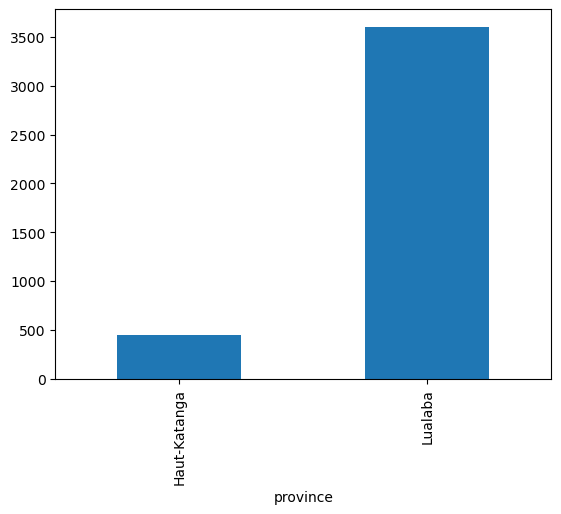

0.0 cobalt mines have interference from armed groups
province
Nord-Kivu     0.335766
Sud-Kivu      0.318431
Ituri         0.166058
Maniema       0.075730
Tshopo        0.052007
Tanganyika    0.050182
Haut-Uele     0.001825
Name: proportion, dtype: float64


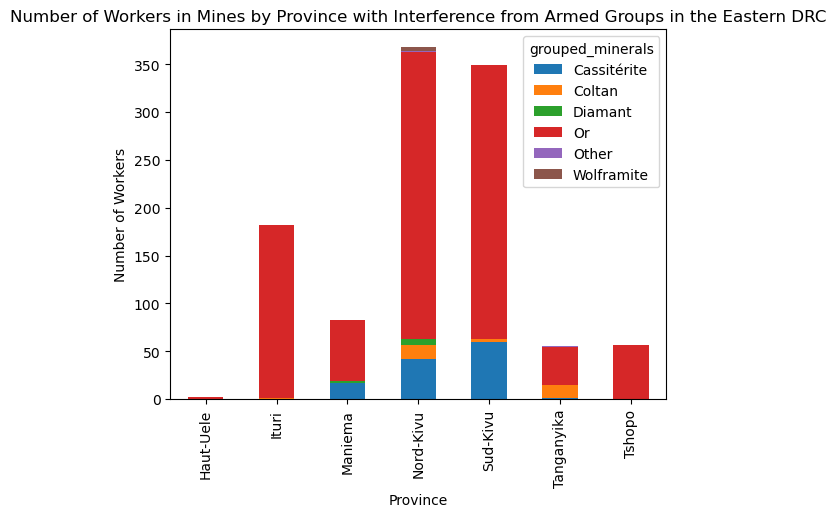

armed_group1
FARDC                                     858
Raïa Mutomboki                             73
NDC-Rénové                                 43
NDC                                        39
Maï-Maï Simba (ex-Morgan - Mangaribi)      32
Maï-Maï FPP/AP                             29
Jeunesse Autodéfense Zaïre                 25
FDLR                                       25
Maï-Maï Yakutumba                          25
Police Nationale Congolaise (sauf PMH)     17
UPLC                                       13
Maï-Maï UPLD                               13
Maï-Maï Simba                              11
Maï-Maï APCLS                              11
Police des Mines (PMH)                     10
FABB (Forces Armées Biloze Bishambuki)     10
FRPI                                        8
Maï-Maï Ebuela Mutetezi                     7
ADF                                         5
Ngomino                                     5
Maï-Maï Lwesula                             5
CODECO               

In [12]:
# Calculating the average amount of workers in mines for each mineral
avg_workers_cobalt = unique_mines_visited.groupby(['grouped_minerals'])['workers_numb'].mean().sort_values(ascending=False)
print(avg_workers_cobalt)

# Despite there only being 22 unique cobalt mines, the average amount of workers per mine is 193, the second highest amount.
# Now let's dive deeper into these 22 cobalt mines and print some additional summary statistics.
cobalt_mines = unique_mines_visited[unique_mines_visited['grouped_minerals'] == 'Cobalt']
cobalt_stats = cobalt_mines['workers_numb'].agg([np.mean, np.median, np.min, np.max])
print(cobalt_stats)

# In which provinces are the cobalt mines located?
cobalt_stats_per_province = cobalt_mines.groupby('province')['workers_numb'].sum()
cobalt_stats_per_province.plot(kind='bar')
plt.show()

#drc_mining_sites('grouped_minerals')['interference'].values_counts(normalize=True, sort=True)

# Do cobalt mines have interference from armed groups?
cobalt_interference = cobalt_mines['interference'].sum()
print(cobalt_interference, "cobalt mines have interference from armed groups")

# Since zero cobalt mines suffer from interference from armed groups, let's take a look at which provinces have the highest proportion of mines with interference?
interference_exists = unique_mines_visited[unique_mines_visited['interference'] == 1]
province_interference = interference_exists['province'].value_counts(normalize=True, sort=True)
print(province_interference)

# Nord-Kivu and South-Kivu both have around ~30% of mines with interference from armed groups. How many workers work at mines in the Eastern DRC with interference from armed groups?
workers_interference = interference_exists.groupby(['province', 'grouped_minerals'])['workers_numb'].size().unstack(fill_value=0)
workers_interference.plot(kind='bar', stacked=True)
plt.xlabel("Province")
plt.ylabel("Number of Workers")
plt.title("Number of Workers in Mines by Province with Interference from Armed Groups in the Eastern DRC")
plt.show()

# Which are the main armed groups, measured by how many workers work at mines where they operate? At which percentage of their sites do they engage in illegal taxation?
main_armed_group = unique_mines_visited['armed_group1'].value_counts()
print(main_armed_group)
#illegal_taxation = unique_mines_visited[unique_mines_visited['taxation_armed_group1'] == 1]
#FARDC_illegal_taxation = illegal_taxation.groupby('armed_group1')['pcode'].sum()
#print(FARDC_illegal_taxation)

In [13]:
# Read the protected areas data that we'll be using to overlay on the mining sites polygon data to explore whether mining activities are distrubing any protected areas
# We'll be reading in three separate shapefiles (which were split due to large size) from the World Database on Protected Areas (https://www.protectedplanet.net/country/COD)
drc_protected_areas_0 = gpd.read_file("C:\\Users\\sylwi\\OneDrive\\Documents\\GitHub\\DRC_Artisinal_Mining\\WDPA\\WDPA_WDOECM_May2024_Public_COD_shp_0\\WDPA_WDOECM_May2024_Public_COD_shp-polygons.shp")
drc_protected_areas_1 = gpd.read_file("C:\\Users\\sylwi\\OneDrive\\Documents\\GitHub\\DRC_Artisinal_Mining\\WDPA\\WDPA_WDOECM_May2024_Public_COD_shp_1\\WDPA_WDOECM_May2024_Public_COD_shp-polygons.shp")
drc_protected_areas_2 = gpd.read_file("C:\\Users\\sylwi\\OneDrive\\Documents\\GitHub\\DRC_Artisinal_Mining\\WDPA\\WDPA_WDOECM_May2024_Public_COD_shp_2\\WDPA_WDOECM_May2024_Public_COD_shp-polygons.shp")

In [14]:
# Combining all three shapefiles
drc_protected_areas_combined = pd.concat([drc_protected_areas_0, drc_protected_areas_1, drc_protected_areas_2], ignore_index=True)

# Saved the combined shapefile
drc_protected_areas_combined.to_file('drc_combined_shp_polygons.shp')

In [15]:
# Print the first few rows and Coordinate Reference System (CRS)
print(drc_protected_areas_combined.head())
print(drc_protected_areas_combined.crs)

   WDPAID WDPA_PID PA_DEF          NAME     ORIG_NAME          DESIG  \
0  1079.0     1079      1        Upemba        Upemba  Parc National   
1  1080.0     1080      1         Maiko         Maiko  Parc National   
2  1082.0     1082      1  Kahuzi-Biega  Kahuzi-Biega  Parc National   
3  1083.0     1083      1       Garamba       Garamba  Parc National   
4  1084.0     1084      1    Kundelungu    Kundelungu  Parc National   

       DESIG_ENG DESIG_TYPE IUCN_CAT        INT_CRIT  ...  \
0  National Park   National       II  Not Applicable  ...   
1  National Park   National       II  Not Applicable  ...   
2  National Park   National       II  Not Applicable  ...   
3  National Park   National       II  Not Applicable  ...   
4  National Park   National       II  Not Applicable  ...   

                                           MANG_AUTH     MANG_PLAN  \
0  Institut Congolais pour la Conservation de la ...  Not Reported   
1  Institut Congolais pour la Conservation de la ...  Not Re

In [16]:
# To ensure we can do distance-based calculations, we will convert them to a projected CRS: the local UTM zone 35, which is identified by EPSG:32735 (https://epsg.io/32735)
drc_mining_sites_utm = drc_mining_sites.to_crs("EPSG:32735")
drc_protected_areas_combined_utm = drc_protected_areas_combined.to_crs("EPSG:32735")

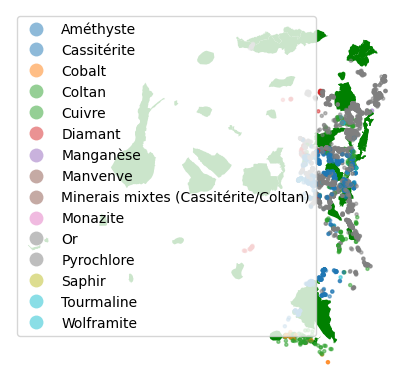

In [17]:
# Both the mining sites and protected areas datasets are in the same CRS: 4326
# We can proceed with plotting both to visualize the overlay
ax = drc_protected_areas_combined_utm.plot(color='green')
drc_mining_sites_utm.plot(ax=ax, markersize=5, column='mineral1', alpha=0.5, legend=True)
ax.set_axis_off()
plt.show()

In [19]:
# Now, let's consider whether these mining sites are nearby and impacting any local cities. Let's consider the capital of DRC, Kinshasa, with a population of nearly 8 million people
# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for Kolwezi city using UTM coordinates. Kolwezi is often referred to as the 'cobalt capital of the world' and is in the Lualaba province - where we saw the most cobalt mining activity.
kolwezi = Point(332323.09602508, 8815133.3504124)

# Create a buffer of 50km around Kolwezi. Note CRS is in meters
kolwezi_buffer = kolwezi.buffer(50000)

# Confirm that the buffer is a polygon
print(type(kolwezi_buffer))

# Check how many mining sites are located within the buffer
mask = drc_mining_sites_utm.within(kolwezi_buffer)
print(mask.sum(), "mining sites are located within the Kolwezi buffer.")

# Calculate the area of national park within the buffer in km2
protected_area_intersection = drc_protected_areas_combined_utm.intersection(kolwezi_buffer).area.sum() / (1000**2)
print(protected_area_intersection, "km2 of protected area are contained within 50 km of Kolwezi, as captured through the World Database on Protected Areas (WDPA).")


<class 'shapely.geometry.polygon.Polygon'>
61 mining sites are located within the Kolwezi buffer.
926.2711275267936 km2 of protected area are contained within 50 km of Kolwezi, as captured through the World Database on Protected Areas (WDPA).


In [20]:
# Determine in which protected area a mining site is located
sites_within_protected_areas = gpd.sjoin(drc_mining_sites_utm, drc_protected_areas_combined_utm, op='within', how='inner')

 # Print the number of mining sites within each park
print(sites_within_protected_areas['ORIG_NAME'].value_counts())

ORIG_NAME
Itombwe                          46
Bassin de la Lufira              26
Luama-Kivu                       23
Kahuzi-Biega                     20
Parc national de Kahuzi-Biega    17
Tayna                            16
Bili-Uere                        12
Okapis                            9
Réserve de faune à okapis         9
Maiko                             3
Luama-Katanga                     3
Upemba                            2
Lufira                            2
Gangala-na-Bodio                  1
Name: count, dtype: int64


In [21]:
# A majority of the mining sites exist within Itombwe Nature reserve, home to the critically endangered eastern lowland gorilla.
# Extract the single polygon for the Itombwe Nature Reserve
itombwe = drc_protected_areas_combined_utm[drc_protected_areas_combined_utm['ORIG_NAME'] == "Itombwe"].geometry.squeeze()

# Take a subset of the mining sites located within Itombwe using the within() method on the geometry column of the mining_sites GeoDataFrame to check if each site is within Itombwe
sites_itombwe = drc_mining_sites_utm[drc_mining_sites_utm.geometry.within(itombwe)]
print(sites_itombwe)

       vid   cid    id                      source  \
42      43    43    43  IPIS - Ministère des Mines   
85      86    86    86  IPIS - Ministère des Mines   
106    107   107   107  IPIS - Ministère des Mines   
183    184   184   184  IPIS - Ministère des Mines   
1501  1502  1348  1348  IPIS - Ministère des Mines   
1724  1725   337   337                         BGR   
2131  2132  1597  1597  IPIS - Ministère des Mines   
2152  2153  1616  1616  IPIS - Ministère des Mines   
2155  2156  1619  1619  IPIS - Ministère des Mines   
2156  2157  1620  1620  IPIS - Ministère des Mines   
2158  2159  1622  1622  IPIS - Ministère des Mines   
2159  2160  1623  1623  IPIS - Ministère des Mines   
2161  2162  1625  1625  IPIS - Ministère des Mines   
2162  2163  1626  1626  IPIS - Ministère des Mines   
2165  2166  1629  1629  IPIS - Ministère des Mines   
2172  2173  1636  1636  IPIS - Ministère des Mines   
2173  2174  1637  1637  IPIS - Ministère des Mines   
2179  2180  1643  1643  IPIS

In [22]:
# What is the distance from the first mining site in the dataset to the closest protected national park
# Get the geometry of the first row
single_mine = drc_mining_sites_utm.geometry[0]

# Calculate the distance from each national park to this mine
dist = drc_protected_areas_combined_utm.distance(single_mine)

# The index of the minimal distance
idx = dist.idxmin()

# Access the name of the corresponding national park
closest_protected_area = drc_protected_areas_combined_utm.loc[idx, 'ORIG_NAME']
print(closest_protected_area)

Maiko


In [23]:
# Now we know how to get the closest national park for a single point, let's do this for all points using a custom function
# Define a function that returns the closest protected area
def closest_protected_area(geom, drc_protected_areas_combined_utm):
    dist = drc_protected_areas_combined_utm.distance(geom)
    idx = dist.idxmin()
    closest_area = drc_protected_areas_combined_utm.loc[idx, 'ORIG_NAME']
    return closest_area

# Call the function on single_mine, testing whether it returns the same result as above
print(closest_protected_area(single_mine, drc_protected_areas_combined_utm))

# Apply the function to all mining sites and assign the result to a column called 'closest_area'
drc_mining_sites_utm['closest_area'] = drc_mining_sites_utm.geometry.apply(closest_protected_area, drc_protected_areas_combined_utm=drc_protected_areas_combined_utm)
print(drc_mining_sites_utm.head())

Maiko
   vid  cid  id                      source      project         pcode  \
0    1    1   1  IPIS - Ministère des Mines  IPIS - 2009  codmine00191   
1    2    2   2  IPIS - Ministère des Mines  IPIS - 2009  codmine00192   
5    6    6   6  IPIS - Ministère des Mines  IPIS - 2009  codmine00286   
6    7    7   7  IPIS - Ministère des Mines  IPIS - 2009  codmine00288   
7    8    8   8  IPIS - Ministère des Mines  IPIS - 2009  codmine00290   

      name  visit_date  visit_onsite visit_onsite_novisitreason  ...  \
0     Eohe  2009-01-01             1                       None  ...   
1     Eita  2009-01-01             1                       None  ...   
5  Kasongo  2009-01-01             1                       None  ...   
6  Mununze  2009-01-01             1                       None  ...   
7   Kiboto  2009-01-01             1                       None  ...   

   traceability  qualification childunder15 childunder15work women womenwork  \
0          None           None      

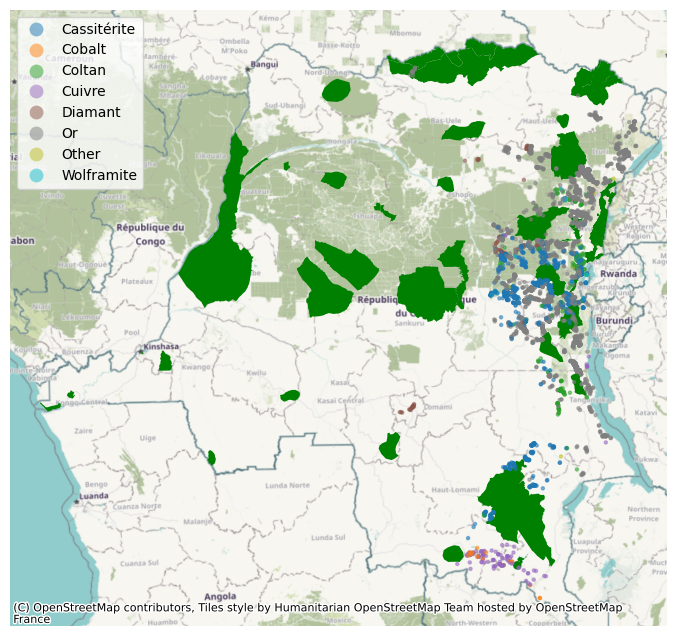

In [25]:
import contextily as cx

# Let's replot using a basemap with the same CRS and making some visual adjustments
fig, ax = plt.subplots(figsize=(12, 8)) 
drc_protected_areas_combined_utm.plot(color='green', ax=ax)
drc_mining_sites_utm.plot(ax=ax, markersize=5, column='grouped_minerals', alpha=0.5, legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs='epsg:32735')
plt.show()

In [26]:
print(drc_mining_sites_utm['grouped_minerals'].describe())

count     5521
unique       8
top         Or
freq      3636
Name: grouped_minerals, dtype: object


In [ ]:
# folium is a heavy load so commenting out for this exercise
# import folium

# # Reproject to EPSG:4326 (WGS 84) for use with folium
# drc_mining_sites_reprojected = drc_mining_sites_utm.to_crs("EPSG:4326")
# drc_protected_areas_combined_reprojected = drc_protected_areas_combined.to_crs("EPSG:4326")

# # Calculate the mean coordinates of the geometry column
# mean_latitude = drc_mining_sites_reprojected.geometry.centroid.y.mean()
# mean_longitude = drc_mining_sites_reprojected.geometry.centroid.x.mean()
# map = folium.Map(location=[mean_latitude, mean_longitude], tiles="OpenStreetMap", prefer_canvas=True)

# # Add geometries to the map
# #folium.GeoJson(data=drc_mining_sites_reprojected['geometry']).add_to(map)
# #folium.GeoJson(data=drc_protected_areas_combined_reprojected['geometry']).add_to(map)

# mine_types = folium.map.FeatureGroup()
# latitudes = list(drc_mining_sites_reprojected.latitude)
# longitudes = list(drc_mining_sites_reprojected.longitude)
# labels = list(drc_mining_sites_reprojected.grouped_minerals)

# for lat, lng, label in zip(latitudes, longitudes, labels):
#  if label == 'Or':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='red', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Cassitérite':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='blue', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Coltan':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='green', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Cuivre':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='gray', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Wolframite':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='purple', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Diamant':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='white', icon='info-sign')
#      ).add_to(map) 
#  elif label == 'Cobalt':
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
#       icon = folium.Icon(color='pink', icon='info-sign')
#      ).add_to(map) 
    
# map